In [27]:
import pandas as pd
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
results = pd.read_csv("/Users/brianritz/projects/findball/output/nu1_findball6/nu1_120s_predictions.csv")

In [3]:
results.head()
results = results[results.velocity]

,pred_velo,drag_param,velo_type,ignore_beg,lbound,pitch_no,distance_ft,fps,zoom,degrees,velocity
0,72.000217,0.000019,velo,-1,0.000000,591,70,120,100,90,72
1,72.000235,0.000019,velo,-1,0.000005,591,70,120,100,90,72
2,72.000214,0.000019,velo,-1,0.000010,591,70,120,100,90,72
3,72.000212,0.000019,velo,-1,0.000015,591,70,120,100,90,72
4,72.048869,0.000020,velo,-1,0.000020,591,70,120,100,90,72


In [4]:
results['resid'] = results.pred_velo - results.velocity
results = results[results.velocity>0]

In [5]:
resid_results = results.groupby(['velo_type', 'ignore_beg', 'lbound'])['resid'].agg({'mse':lambda x: (x**2).mean(),'count': lambda x: len(x)})

In [7]:
resid_results.sort(columns='mse').to_csv("/Users/brianritz/temp/mseresults.csv")

In [8]:
correct = results[(results.velo_type=='velo')&(np.isclose(results.lbound, 0.00003))&(results.ignore_beg==0)]

In [10]:
print metrics.mean_squared_error(correct.velocity, correct.pred_velo)
print metrics.mean_absolute_error(correct.velocity, correct.pred_velo)

4.71755693467
1.60543736762


/Users/brianritz/.virtualenvs/findball/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


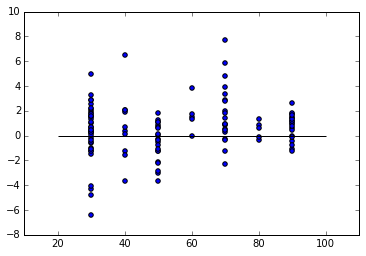

In [11]:
plt.scatter(correct.distance_ft, correct.resid)
plt.hlines(0,20, 100)

In [14]:
correct['big_miss'] = (abs(correct.resid) > 2)
correct['corrected_velo'] = correct.pred_velo-0.57288404980979846

/Users/brianritz/.virtualenvs/findball/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/brianritz/.virtualenvs/findball/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [12]:
metrics.mean_absolute_error(correct.pred_velo, correct.velocity)

1.6054373676177294

In [16]:
pd.crosstab(correct.big_miss, correct.zoom)

zoom,0,100
big_miss,,
False,48,40
True,21,10


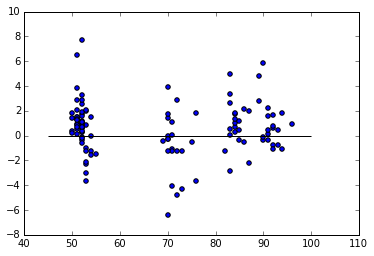

In [86]:
plt.scatter(correct.velocity, correct.resid)
plt.hlines(0,45,100)

In [18]:
correct['hit_bound'] = np.isclose(correct.drag_param, correct.lbound)

/Users/brianritz/.virtualenvs/findball/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
pd.crosstab(correct.big_miss, correct.hit_bound)

hit_bound,False,True
big_miss,,
False,19,69
True,7,24


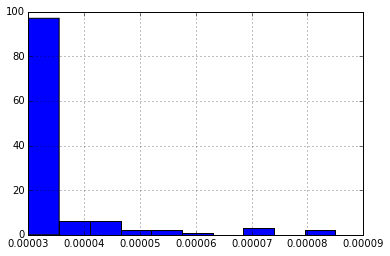

In [92]:
correct.drag_param.hist()

In [110]:
subset70ft = correct[correct.distance_ft==70]
subset30ft = correct[correct.distance_ft==30]

In [24]:
zoom0=correct[correct.zoom==0]
zoom100 = correct[correct.zoom==100]

In [26]:
print metrics.mean_squared_error(zoom0.pred_velo, zoom0.velocity)
print metrics.mean_squared_error(zoom100.pred_velo, zoom100.velocity)
print metrics.mean_absolute_error(zoom0.pred_velo, zoom0.velocity)
print metrics.mean_absolute_error(zoom100.pred_velo, zoom100.velocity)

4.71927961677
4.71517963337
1.63191104455
1.56890369345
